In [1]:
import pandas as pd
pd.__version__

'0.23.4'

In [2]:
# install older version of pandas
!pip install pandas==0.23.4

In [3]:
%matplotlib inline
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
# Check pandas version again by doing RESTART & RUN ALL
pd.__version__

'0.23.4'

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [5]:
dir(random)  # Reminding ourselves what we can do here

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_os',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [6]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [7]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

users = []
random.seed(100) # Set seed for reproducibility

for _ in range(250):
  # Desktop users
  time_on_site = random.uniform(10, 600)
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
  time_on_site = random.uniform(5, 300)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
print(users[:10])

[User(purchased=False, time_on_site=341.9790515007597, mobile=False), User(purchased=True, time_on_site=34.35775861345752, mobile=True), User(purchased=False, time_on_site=126.70673079042234, mobile=False), User(purchased=False, time_on_site=30.844477406989927, mobile=True), User(purchased=True, time_on_site=130.28302197834566, mobile=False), User(purchased=False, time_on_site=251.80068638723867, mobile=True), User(purchased=True, time_on_site=171.91794654749313, mobile=True), User(purchased=True, time_on_site=405.3539045504913, mobile=False), User(purchased=False, time_on_site=38.58643005300227, mobile=True), User(purchased=True, time_on_site=239.52960168497634, mobile=True)]


In [8]:
# Let's put this in a dataframe so we can look at it more easily
user_data = pd.DataFrame(users)
user_data.head()

,purchased,time_on_site,mobile
0,False,341.979052,False
1,True,34.357759,True
2,False,126.706731,False
3,False,30.844477,True
4,True,130.283022,False


In [9]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
purchased       1000 non-null bool
time_on_site    1000 non-null float64
mobile          1000 non-null bool
dtypes: bool(2), float64(1)
memory usage: 9.8 KB


In [10]:
user_data.describe()

,time_on_site
count,1000.000000
mean,195.160415
std,130.014047
min,5.089080
25%,96.720146
50%,179.672397
75%,263.814023
max,599.539677


In [11]:
user_data.describe(exclude=[np.number])

,purchased,mobile
count,1000,1000
unique,2,2
top,False,True
freq,627,750


In [12]:
user_data.describe(include=bool)

,purchased,mobile
count,1000,1000
unique,2,2
top,False,True
freq,627,750


In [13]:
user_data.describe(include=['bool'])

,purchased,mobile
count,1000,1000
unique,2,2
top,False,True
freq,627,750


In [14]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,5.089079959772693,5.214435589906385,5.5973698583710565,5.635667731203808,6.14358703637421,6.826922023953648,6.835147486981073,7.120534930996337,8.088221744555954,8.238176853416398,...,579.8483231085819,580.0272614264908,581.6294548648808,589.0714110046416,591.1654150912292,592.0445830370513,595.3868877542628,597.9361109327675,598.8576701874757,599.539677408299
purchased,,,,,,,,,,,,,,,,,,,,,
False,1,0,1,1,1,1,0,0,0,1,...,0,0,0,1,0,0,1,1,0,0
True,0,1,0,0,0,0,1,1,1,0,...,1,1,1,0,1,1,0,0,1,1


In [15]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

time_bins = pd.cut(user_data['time_on_site'], 5)  # 5 equal-sized bins
pd.crosstab(user_data['purchased'], time_bins)

time_on_site,"(4.495, 123.979]","(123.979, 242.869]","(242.869, 361.759]","(361.759, 480.65]","(480.65, 599.54]"
purchased,,,,,
False,230,228,111,40,18
True,103,133,89,22,26


In [16]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(user_data['purchased'], time_bins, normalize='columns')

time_on_site,"(4.495, 123.979]","(123.979, 242.869]","(242.869, 361.759]","(361.759, 480.65]","(480.65, 599.54]"
purchased,,,,,
False,0.690691,0.631579,0.555,0.645161,0.409091
True,0.309309,0.368421,0.445,0.354839,0.590909


In [17]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

mobile,False,True
purchased,,
False,0.68,0.609333
True,0.32,0.390667


In [92]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?

ct = pd.crosstab([user_data['mobile'], time_bins], user_data['purchased'],
            rownames=['mobile', 'time on site'],
            colnames=['purchased'],
            normalize='columns'
            )
ct

purchased                     False     True 
mobile time on site                          
False  (4.495, 123.979]    0.070175  0.016086
       (123.979, 242.869]  0.052632  0.024129
       (242.869, 361.759]  0.055821  0.045576
       (361.759, 480.65]   0.063796  0.058981
       (480.65, 599.54]    0.028708  0.069705
True   (4.495, 123.979]    0.296651  0.260054
       (123.979, 242.869]  0.311005  0.332440
       (242.869, 361.759]  0.121212  0.193029

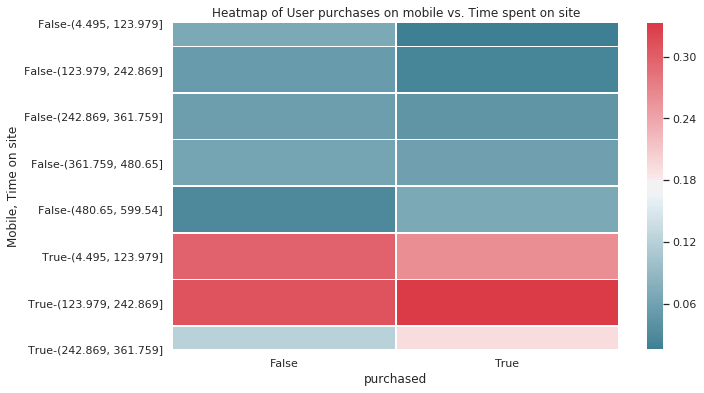

In [93]:
fig, axs = plt.subplots(figsize=(10, 6))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(ct, cmap=cmap,
                linewidths=.5, ax=axs)
plt.title('Heatmap of User purchases on mobile vs. Time spent on site')
plt.ylabel('Mobile, Time on site')
plt.show();

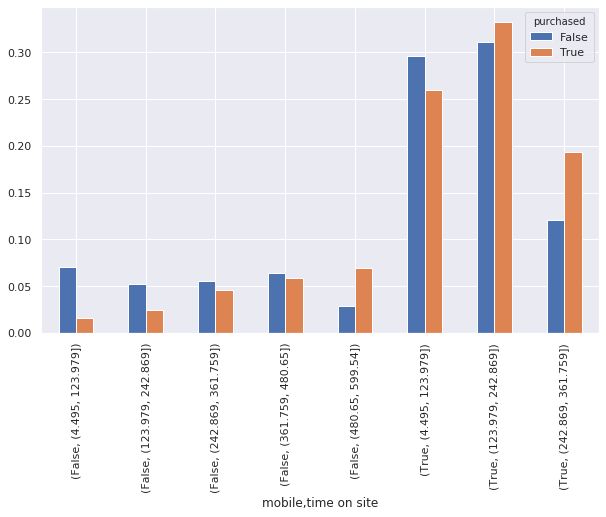

In [73]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
ct.plot(kind='bar', ax=ax);

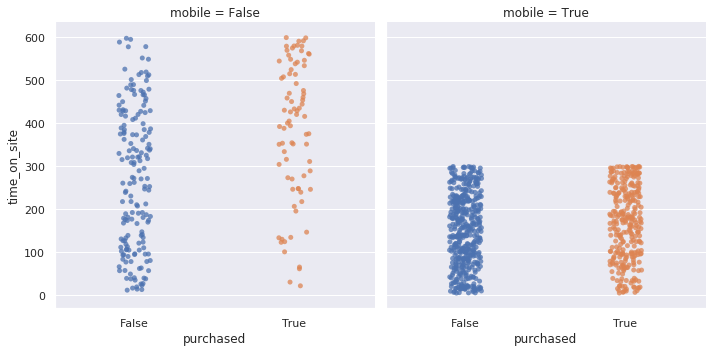

In [50]:
sns.catplot(x='purchased', y='time_on_site', 
            col='mobile', data = user_data,
            alpha=0.75);

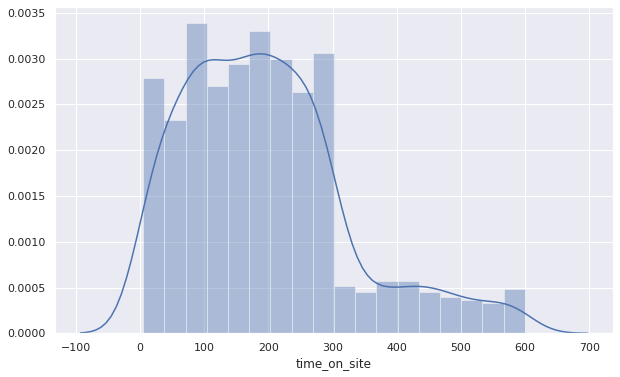

In [63]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
sns.distplot(user_data['time_on_site'], ax=ax);

In [41]:
pt = pd.pivot_table(user_data, values='purchased', index=time_bins)
pt

,purchased
time_on_site,
"(4.495, 123.979]",0.309309
"(123.979, 242.869]",0.368421
"(242.869, 361.759]",0.445000
"(361.759, 480.65]",0.354839
"(480.65, 599.54]",0.590909


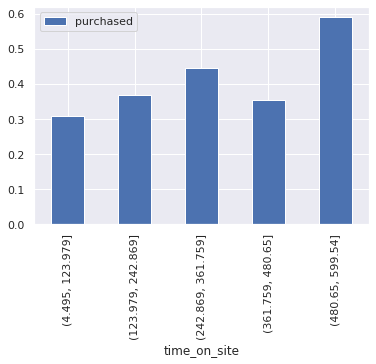

In [42]:
pt.plot.bar()

In [94]:
ct = pd.crosstab(user_data['mobile'], [user_data['purchased'], time_bins],
            rownames=['mobile'],
            colnames=['purchased', 'time on site'],
            normalize='columns'
            )
ct

purchased               False                                        \
time on site (4.495, 123.979] (123.979, 242.869] (242.869, 361.759]   
mobile                                                                
False                0.191304           0.144737           0.315315   
True                 0.808696           0.855263           0.684685   

purchased                                                  True   \
time on site (361.759, 480.65] (480.65, 599.54] (4.495, 123.979]   
mobile                                                             
False                      1.0              1.0         0.058252   
True                       0.0              0.0         0.941748   

purchased                                                             \
time on site (123.979, 242.869] (242.869, 361.759] (361.759, 480.65]   
mobile                                                                 
False                  0.067669           0.191011               1.0   
True                   0.932331           0.808989               0.0   

purchased                      
time on site (480.65, 599.54]  
mobile                         
False                     1.0  
True                      0.0

In [96]:
ct = pd.crosstab(time_bins, [user_data['purchased'], user_data['mobile']],
            rownames=['time on site'],
            colnames=['purchased', 'mobile'],
            normalize='columns'
            )
ct

purchased              False             True           
mobile                 False     True    False     True 
time on site                                            
(4.495, 123.979]    0.258824  0.407002  0.0750  0.331058
(123.979, 242.869]  0.194118  0.426696  0.1125  0.423208
(242.869, 361.759]  0.205882  0.166302  0.2125  0.245734
(361.759, 480.65]   0.235294  0.000000  0.2750  0.000000
(480.65, 599.54]    0.105882  0.000000  0.3250  0.000000

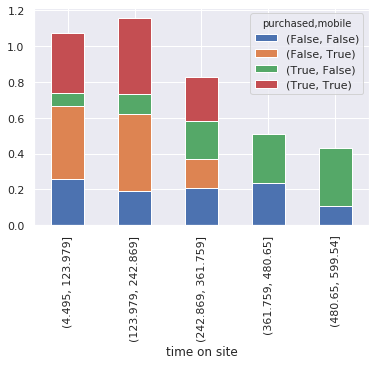

In [97]:
ct.plot(kind='bar', stacked=True)

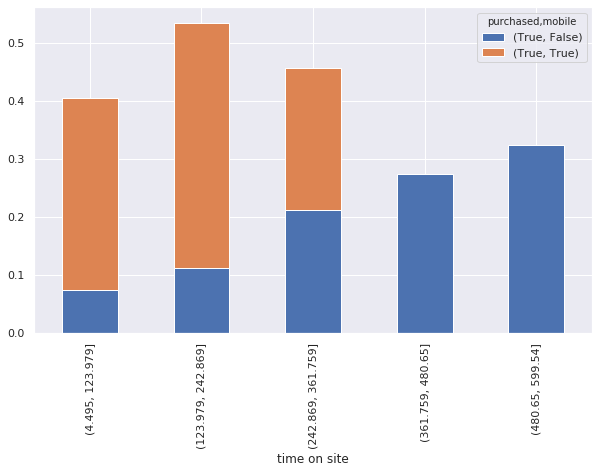

In [110]:
ct.iloc[:, [2, 3]].plot.bar(stacked=True, figsize=(10, 6));

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [19]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)